In [2]:
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from skimage import io, transform, color

from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks

In [3]:
def crop_image(display,img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    return display[np.ix_(mask.any(1),mask.any(0))]

In [2]:
def load_crop(path):
    folders=os.listdir(path)
#     folders=["Youtham","Nora"]
    folders=["Asmaa"]
    images=[]
    for folder in folders:
        for img in os.listdir(os.path.join(path,folder)):
            image= io.imread(os.path.join(path,folder,img))

            width = int(image.shape[1] / 10)
            height = int(image.shape[0]  / 10)
            dim = (width, height)

            image=cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
#             image= cv2.medianBlur(image,3)
            display=image.copy()
            image =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image=canny(image, sigma=3, low_threshold=10, high_threshold=50)
            final=crop_image(display,image,tol=0)
            final =cv2.resize(final,(416,416))
            
            images.append(final)
    return np.array(images)

In [4]:
def load_crop_sample(path):
    images=[]
    images_before=[]
    for img in os.listdir(path):
        image= io.imread(os.path.join(path,img))
        images_before.append(image)
        width = int(image.shape[1] / 10)
        height = int(image.shape[0]  / 10)
        dim = (width, height)

        image=cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        image= cv2.medianBlur(image,3)
        display=image.copy()
        image =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image=canny(image, sigma=3, low_threshold=10, high_threshold=50)
        final=crop_image(display,image,tol=0)
        final =cv2.resize(final,(416,416))

        images.append(final)
    return np.array(images)
    

In [6]:
def save_cropped(images,path,name):
    for i,img in enumerate(images):
        io.imsave(path+name+str(i)+'.jpg', img)

# sample

In [5]:
path='../Darts_dataset/sample'
images=load_crop_sample(path)

In [7]:
saving_path='../Darts_dataset/sample/'
name='a_'
save_cropped(images,saving_path,name)

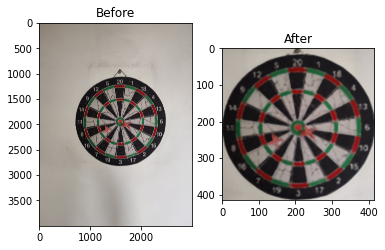

In [16]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(images_before[0])
axarr[0].title.set_text("Before")
axarr[1].imshow(images[0])
axarr[1].title.set_text("After")

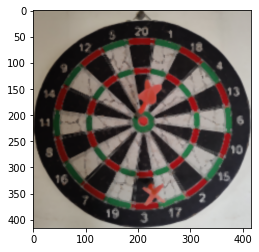

In [39]:
img=images[4]
plt.imshow(img)

# All data

In [11]:
path='../Darts_dataset/'
images=load_crop(path)

In [12]:
images.shape

(136, 416, 416, 3)

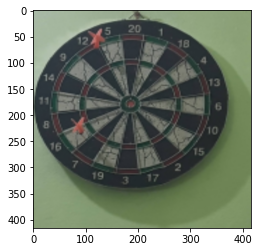

In [19]:
plt.imshow(images[1])

In [27]:
saving_path='../Darts_dataset/Asmaa_cropped/'
name='a_'
save_cropped(images,saving_path,name)